# **Visualization of MFCC pre-processing method**

1.   Amplitude Scale Audio
2.   Framing Windowing
3.   Fourier Transform
4.   Mel Filterbank
5.   Discrete Cosine Transform


In [2]:
from time import sleep

import pickle
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm # for color map
from python_speech_features import logfbank, fbank


# Library for performing speech recognition
# Python 2.6, 2.7, or 3.3+ (required)
# PyAudio 0.2.11+ (required only if you need to use microphone input, Microphone)
# More : https://github.com/Uberi/speech_recognition
import speech_recognition as sr 


Checking librosa version and speech_recognition version

In [3]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", sr.__version__)

librosa version :  0.7.2
speech_recognition version :  3.8.1


## Recording Speech

 Creates a new ``Recognizer`` instance, which represents a collection of speech recognition functionality.

In [4]:
r = sr.Recognizer() 

print("음성 데이터 녹음")
file_name = str(input("이름을 입력하세요 : "))


음성 데이터 녹음
이름을 입력하세요 : 200424_subin


Print a list of connected microphones

In [7]:
list_0 =sr.Microphone.list_microphone_names()
for i in range(0, len(list_0)-1):
    print(list_0[i])

HDA Intel PCH: ALC892 Analog (hw:0,0)
HDA Intel PCH: ALC892 Digital (hw:0,1)
HDA Intel PCH: ALC892 Alt Analog (hw:0,2)
HDA NVidia: HDMI 0 (hw:1,3)
HDA NVidia: HDMI 1 (hw:1,7)
HDA NVidia: HDMI 2 (hw:1,8)
HDA NVidia: HDMI 3 (hw:1,9)
Webcam C170: USB Audio (hw:2,0)
sysdefault
front
surround21
surround40
surround41
surround50
surround51
surround71
iec958
spdif
pulse
dmix


Speech recording and save as WAV file

In [8]:
# Higher sample_rate result in better audio quality, slower recognition
# Higher chunk_size help avoid triggering on rapidly changing ambient noise,
#  but also makes detection less sensitive
microphone = sr.Microphone(device_index=7, sample_rate=None, chunk_size=1024)

In [12]:
 with microphone as source:
    print("15초 동안 녹음을 시작합니다.")
    print("녹음이 시작되면 다음 문장을 읽어주세요.\n")
        
    print("죽는 날까지 하늘을 우러러\n한 점 부끄러움이 없기를 \
        \n잎새에 이는 바람에도 \n나는 괴로워했다.\n별을 노래하는 마음으로 \
        \n모든 죽어가는 것을 사랑해야지\n그리고 나한테 주어진 길을\n걸어가야겠다")
        
    sleep(4)
        
        
    print("*****   녹음 시작   *****\n")
        
    # This method reads the first second of the file stream 
    # and calibrates the recognizer to the noise level of the audio.
    # adjust_for_ambient_noise는 첫 번째 초에 해당하는 오디오를 듣고 노이즈를 교정하는 메소드
    r.adjust_for_ambient_noise(source, duration=1)
        
    '''
    !! adjust_for_ambient_noise를 사용하면 첫 번째 초를 잃게 됨. -> sleep(4)인 이유
    !! 오디오의 1초는 노이즈 레벨을 판단하는 요소 : duration 으로 조정 가능, 가능한 0.5초 이상인게 좋다.
    !! durations longer than the default of one second generate better results.
    !! durations의 최솟값은 마이크의 주변 환경에 따라 다름.
    '''
        
    # This method takes an audio source as its first argument and
    # records input from the source until silence is detected.
    # microphone의 입력을 감지, 무음이 감지될 때까지 소스의 입력을 기록한다. -> 종료되는 오류의 원인일 가능성    
    audio = r.listen(source , phrase_time_limit=15)
        
    # audio는 AudioData(frame_data, source.SAMPLE_RATE, source.SAMPLE_WIDTH)
        
        
    print(" 녹음 완료. ")
        
        
    # Audio file 저장
    result_name = file_name + "_" + str(0)
    save_path = "./test_train_data/"
        
    if not os.path.exists(save_path + file_name):
        os.makedirs(save_path + file_name)
        
    with open(save_path + file_name + "/" + result_name+".wav", "wb") as f:
        f.write(audio.get_wav_data()) # AudioData to .wav
        print("''"+result_name + "' File Write Finish !")
            
    final_file_name = save_path + file_name + "/" + result_name+".wav"
    print(" Final File Name : "+final_file_name)
        
            

15초 동안 녹음을 시작합니다.
녹음이 시작되면 다음 문장을 읽어주세요.

죽는 날까지 하늘을 우러러
한 점 부끄러움이 없기를        
잎새에 이는 바람에도 
나는 괴로워했다.
별을 노래하는 마음으로        
모든 죽어가는 것을 사랑해야지
그리고 나한테 주어진 길을
걸어가야겠다
*****   녹음 시작   *****

 녹음 완료. 
''200424_subin_0' File Write Finish !
 Final File Name : ./test_train_data/200424_subin/200424_subin_0.wav


Loads and decodes the audio as a time series 1D array

In [19]:
'''
 y: loads and decodes the audio as a time series (one-dimensional NumPy floating point array)
 sr : the sampling rate of y, that is, the number of samples per second of audio
         
 mono=True : Convert stereo type to mono type (convert signal to mono)
 duration : only load up to this much audio (in seconds)
'''      
y, sr = librosa.load(final_file_name, sr=16000, mono=True, duration=15)


## Visualization Amplitude Scale Audio Signal

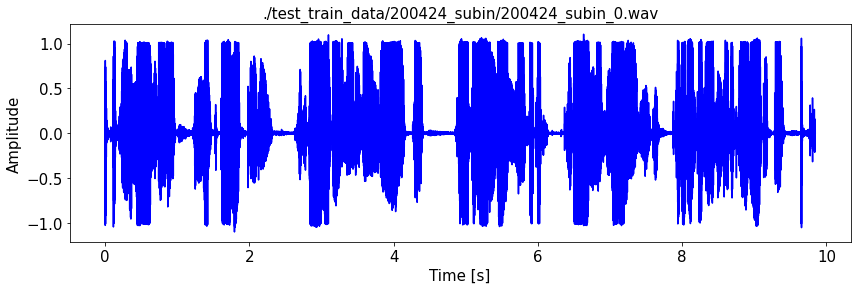

In [151]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(final_file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.show()

Graph using Librosa library

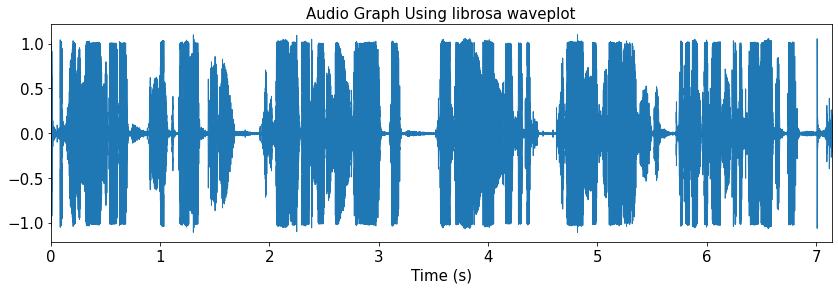

In [152]:
plt.figure()
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Audio Graph Using librosa waveplot')

'''
 y:np.ndarray [shape=(n,) or (2,n)]
 sr:sampling rate of y
 max_points:Maximum number of time-points to plot
 x_axis:str or None, ‘time’, 's'(as seconds), 'ms', etc. 
 max_sr:Maximum sampling rate for the visualization(max_sr > 0)
'''
librosa.display.waveplot(y=y, sr=22050, max_points=50000.0, x_axis='s',offset=0.0, max_sr=1000)


####   **Audio Describe using Tempogram**  

 Tempogram은 오디오 신호의 Tempo 변화 및 local pulse를 특성화하도록 구성한다.  
특정 시간 지연 I 또는 BPM 값 T가 주어지면, 오디오 신호의 시간에 따른 pulse 강도 변화를 나타낸다.


*    Autocorrelation  
주어진 시계열과 연속된 시간 간격 동안 지연된 버전 사이의 유사도를 수학적으로 표현한 것이다.  
변수의 현재 값과 과거 값 사이의 관계를 측정하기 때문에 지연된 상관 관계 또는 직렬 상관이라고도 한다.  

*    Tempo  
tempo는 audio가 얼마나 빠른지 또는 느린지 나타내는 것이다.  
일반적으로 분당 비트 수로 측정된다.  

/home/subin/.local/lib/python3.6/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '



Estimated global tempo = 104.167 BPM


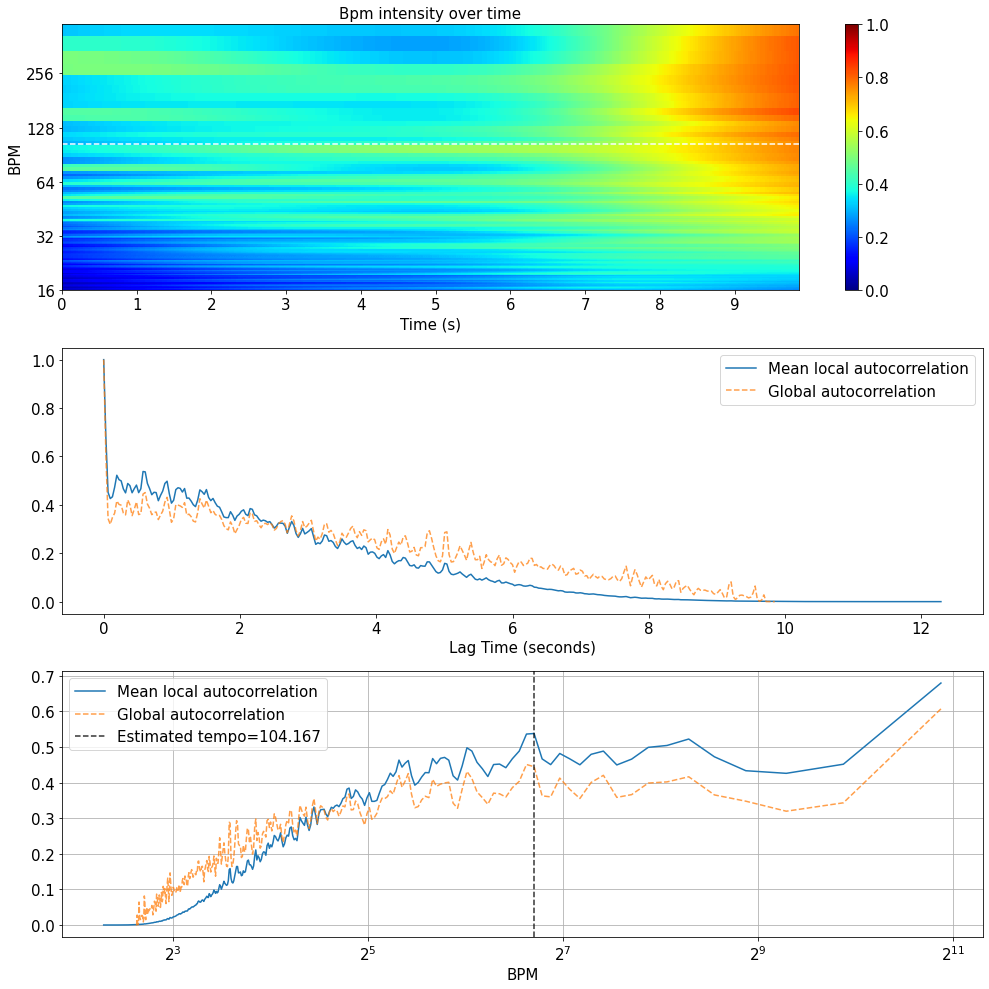

In [153]:
'''
 A tempogram is a time-pulse representation of an audio signal 
 laid out such that it indicates the variation of pulse strength.
 
 Tempogram은 pulse 강도의 변화를 나타낸다.
'''
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
Tgram = librosa.feature.tempogram(y=y, sr=sr, onset_envelope = oenv)


ac_global = librosa.autocorrelate(oenv, max_size=Tgram.shape[0])
ac_global = librosa.util.normalize(ac_global)
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr, hop_length=512)[0]

print('\nEstimated global tempo = {:g} BPM'.format(tempo))

plt.rcParams["figure.figsize"] = (14,14)
plt.subplot(3, 1, 1)
plt.title("Bpm intensity over time")
librosa.display.specshow(data=Tgram, x_coords=None, y_coords=None, x_axis='s', y_axis='tempo', sr=sr, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12,cmap=cm.jet)
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Estimated tempo={:g}'.format(tempo))
plt.colorbar()

plt.subplot(3, 1, 2)
x = np.linspace(0, Tgram.shape[0] * float(512) / sr, num=Tgram.shape[0])
plt.plot(x, np.mean(Tgram, axis=1), label='Mean local autocorrelation')
plt.plot(x[:len(ac_global)], ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag Time (seconds)')
plt.axis('tight')

# Show legend on graph
plt.legend(frameon=True)

# plot on a BPM axis
plt.subplot(3, 1, 3)
# Compute frequency (in beats per minute)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=512, sr=sr)

# semilogx creates a plot using a base 10 logrithmic scale for the x-axis
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:len(ac_global)], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)

# Add a vertical line across the axes
plt.axvline(tempo, color='black', linestyle='--', alpha=.8,label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.rc('axes', titlesize=15)
plt.grid()
plt.tight_layout()
plt.show()

## Framing Windowing

## Fourier Transform

*   **CQT (Constant-Q Transform)**

이 변환은 주파수 축이 로그 단위로 변환되고,각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도)  
음악을 처리하는 데에 FFT 변환보다 유리하다고 알려져 있다.


In [154]:
constantQ = librosa.cqt(y, sr=sr)

# librosa.cqt()는 spectogram을 반환한다.
# spectogram은 복소수로 반환되므로, amplitude_to_db를 사용할 때 np.abs를 적용해야 한다.

*   **STFT (Short-Time Fourier Transform)**

STFT란 시간이 지남에 따라 변화하는 신호의 사인파 주파수와 위상 성분을 결정하는 데 사용되는 푸리에 관련 변환이다.  
STFT는 시간에 따라 변화하는 긴 신호를 짧은 시간 단위로 분할한 다음에 푸리에 변환을 적용하기에  
결과적으로 각 시간 구간마다 어떤 주파수들이 존재하는지 알 수 있다.

In [155]:
stft = librosa.stft(y)

# librosa.stft()는 spectogram을 반환한다.
# spectogram은 복소수로 반환되므로, amplitude_to_db를 사용할 때 np.abs를 적용해야 한다.

## Mel Filterbank

## Convert to Log Scale 

*   **Value with CQT applied**


**Frequency** : 주파수는 소리의 파장, 보통 1초당 한 점을 통과하는 파동의 수이다. (소리의 음색)  

*목소리의 주파수 대역은 30Hz ~ 3000Hz이다.*  

**Decibel** : Decibel은 소리의 상대적인 크기를 나타내는 단위이다.(소리의 음고)

*- 70dB 이하의 신호는는 매우 낮은 신호로 간주된다.*


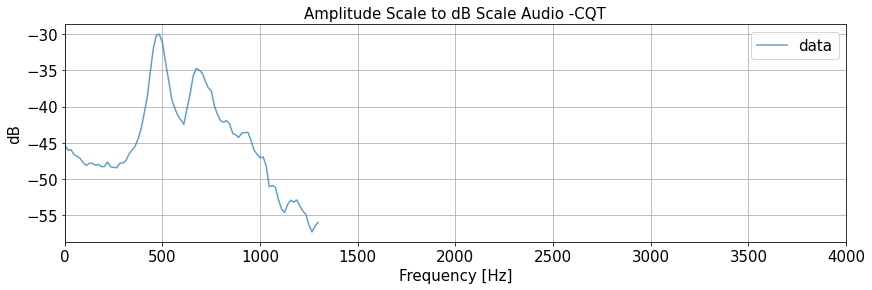

In [161]:
'''
S:(np.ndarray) input amplitude
abs(S)는 ref: 20 * log10(S / ref)로 조정되며, 출력 0은 S==ref인 위치
amin:minimum threshold for S and ref
top_db :threshold the output at top_db below the peak: max(20 * log10(S)) - top_db
'''
using_CQT_dB = librosa.amplitude_to_db(S=np.abs(constantQ), ref=np.max, amin=1e-05,top_db=80.0)

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Amplitude Scale to dB Scale Audio -CQT")
# plt.xlim(0, 100)
# plt.plot(using_CQT_dB.flatten())

data_using_cqt = np.mean(using_CQT_dB, axis=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.xticks(range(0, 512//2+1, 32), np.arange(0, 4001, 500))
plt.xlim(0, 512//2)

plt.plot(data_using_cqt, label='data', alpha=0.7)
plt.grid()
plt.legend()
plt.show()


# Now, the weaker the signal power, the more negative the dBm value.
# A signal with a -70 dBm power level is a very low power signal.

Display using Spectogram

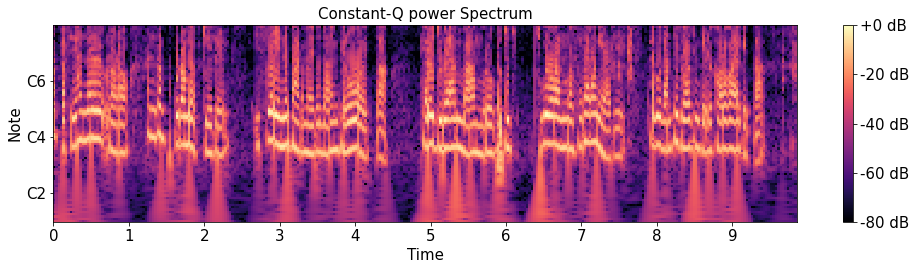

In [159]:
librosa.display.specshow(using_CQT_dB, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power Spectrum')
plt.tight_layout()
plt.show()

*   **Value with STFT applied**

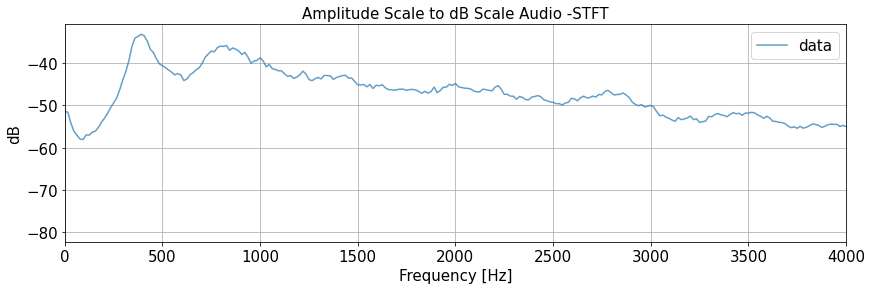

In [175]:
'''
S:(np.ndarray) input amplitude
abs(S)는 ref: 20 * log10(S / ref)로 조정되며, 출력 0은 S==ref인 위치
amin:minimum threshold for S and ref
top_db :threshold the output at top_db below the peak: max(20 * log10(S)) - top_db
'''
using_STFT_dB= librosa.amplitude_to_db(S=np.abs(stft), ref=np.max, amin=1e-05,top_db=80.0)
plt.rcParams["figure.figsize"] = (14,4)
plt.title("Amplitude Scale to dB Scale Audio -STFT")

data_using_stft = np.mean(using_STFT_dB, axis=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("dB")
plt.xticks(range(0, 512//2+1, 32), np.arange(0, 4001, 500))
plt.xlim(0, 512//2)

plt.plot(data_using_stft, label='data', alpha=0.7)
plt.grid()
plt.legend()
plt.show()

# Voice has Frequency range of 30Hz ~ 3000Hz

# Now, the weaker the signal power, the more negative the dBm value.
# A signal with a -70 dBm power level is a very low power signal.

Display using Spectogram

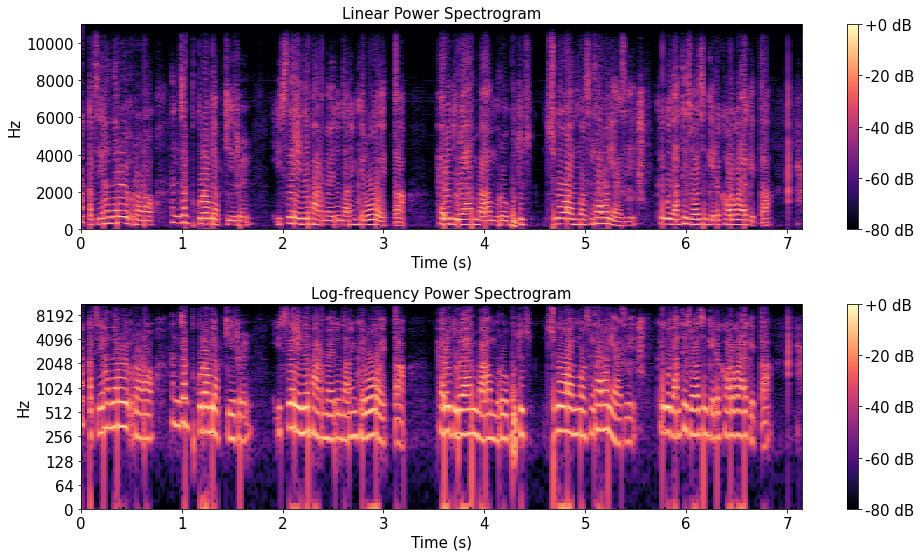

In [173]:
plt.rcParams["figure.figsize"] = (14,8)
plt.subplot(2, 1, 1)
librosa.display.specshow(using_STFT_dB, x_coords=None, y_coords=None, x_axis='s', y_axis='linear', sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12)
plt.title('Linear Power Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(using_STFT_dB, x_coords=None, y_coords=None, x_axis='s', y_axis='log', sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12)
plt.title('Log-frequency Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

/home/subin/.local/lib/python3.6/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


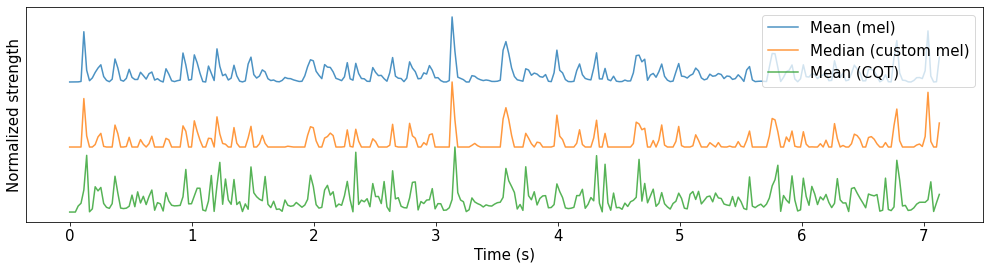

In [177]:
'''
 onset strength는 발병 강도를 나타낸다.
'''

plt.figure()
times = librosa.times_like(using_STFT_dB)

# standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

# Median aggregation, and custom mel options
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env = librosa.onset.onset_strength(sr=sr, S=using_CQT_dB)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.xlabel('Time (s)')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()
plt.rc('axes', titlesize=15)
plt.show()

## Discrete Cosine Transform